<a href="https://colab.research.google.com/github/LucasLacerda-git/Previs-o-de-Vendas-em-uma-Rede-com-1.115-Lojas-F-sicas/blob/main/Previs%C3%A3o_de_Vendas_em_uma_Rede_com_1_115_Lojas_F%C3%ADsicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Apresentação
Este projeto de Ciência de Dados visa prever as vendas diárias de uma rede com 1.115 lojas físicas, a partir de dados históricos. O objetivo principal é construir um modelo preditivo robusto, que possa auxiliar na tomada de decisões estratégicas como planejamento de estoque, ações promocionais e logística.

---

A base de dados contempla dois principais dataframes:

Vendas: contendo informações como volume de vendas, número de clientes, promoções, feriados e mais.

Clientes: dados sobre o comportamento e volume de consumidores por loja.

A análise respeita características de sazonalidade, como feriados, promoções e férias escolares, além de variações semanais e a influência de concorrência e fechamento temporário de lojas.


*** Mais detalhes técnicos (como o dicionário de dados) estão disponíveis no Documento de Requisitos.***

####**Objetivo**
Desenvolver um modelo preditivo capaz de estimar as vendas diárias de cada loja, considerando variáveis internas e externas, com o intuito de melhorar o planejamento de estoque, logística e estratégias promocionais.

##**Importação de Bibliotecas e carregamento de dados**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

##### Carregamento e Visualização Inicial dos Dados de Venda

In [ ]:
sales_train_df = pd.read_csv('/content/train.csv')

<ipython-input-2-62b030802b62>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('/content/train.csv')


In [ ]:
sales_train_df.shape

(1017209, 9)

In [ ]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [ ]:
sales_train_df['Open'].unique()

array([1, 0])

In [ ]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#####**Resumo**

**Volume de dados** -
Mais de 1 milhão de registros (1.017.209 linhas).

Os dados vêm de 1.115 lojas diferentes (Store varia de 1 a 1115).


---


**Vendas (Sales)** -
Média de vendas por dia: R$ 5.774

Variação grande: tem lojas que vendem até R$ 41.551 em um único dia.

Vendas zeradas existem → normalmente quando a loja estava fechada (Open = 0).


---


**Clientes (Customers)** -
Em média, 633 clientes por dia por loja.

Varia de 0 até mais de 7 mil clientes em um único dia — outro sinal de variabilidade forte.

---

**Status da loja (Open)** -
A loja está aberta em ~83% dos registros.

Isso quer dizer que em cerca de 17% dos dias a loja estava fechada.

---

**Promoções (Promo)** -
Em ~38% dos dias as lojas estão em promoção.

Essa coluna deve ser um fator importante na previsão de vendas.

---

**Férias escolares (SchoolHoliday)** -
Apenas em ~18% dos registros temos feriado escolar.

Pode influenciar o fluxo de clientes dependendo da localização da loja.



##### Carregamento e Visualização Inicial dos Dados Loja

In [ ]:
store_info_df = pd.read_csv('/content/store.csv')

In [ ]:
store_info_df.shape

(1115, 10)

In [ ]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


##### **Resumo**

Grande variação na distância para concorrentes: algumas lojas têm concorrentes muito próximos (20m!), outras a muitos km. Essa variação pode impactar muito as vendas, já que concorrência próxima tende a reduzir o volume.

Datas de abertura da concorrência com dados faltantes: mais de 350 lojas não têm esses dados, talvez porque não têm concorrentes próximos.

##**Análise Exploratória**(vendas)

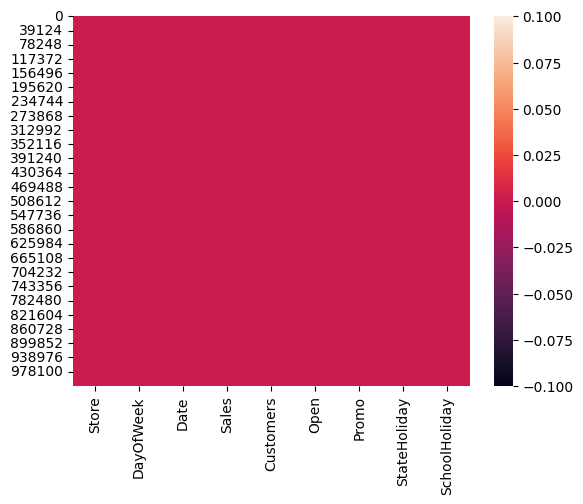

In [ ]:
sns.heatmap(sales_train_df.isnull());

In [ ]:
sales_train_df.isnull().sum()
#verificando presença de valores nulos

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

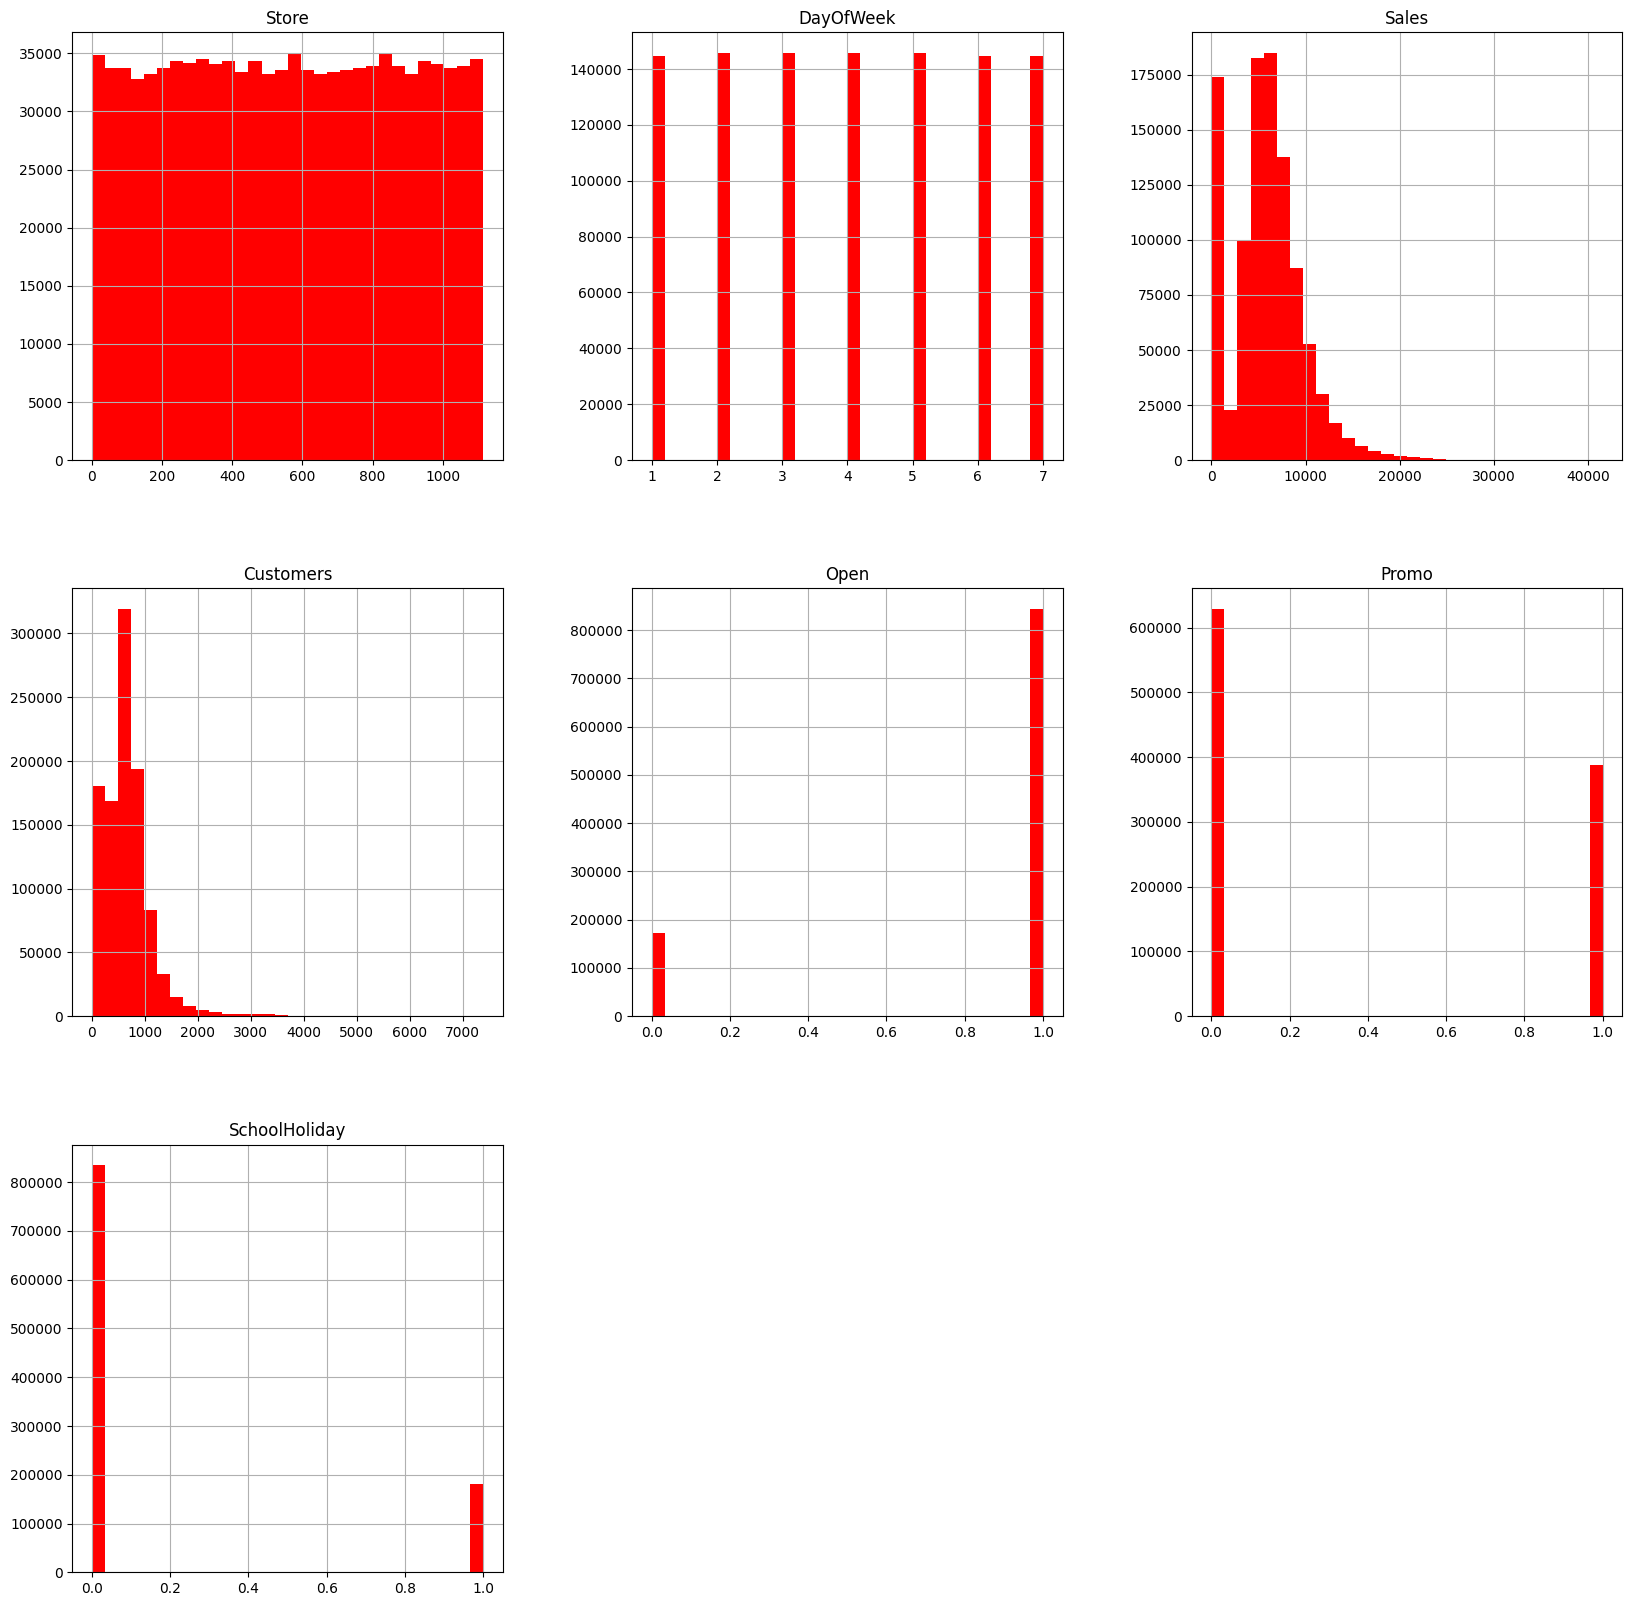

In [ ]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [ ]:
sales_train_df['Customers'].max()

7388

In [ ]:
sales_train_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0


In [ ]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


In [ ]:
172817 / len(store_info_df)

154.99282511210762

In [ ]:
closed_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


##**Pré-processamento**: Limpeza dos Dados de Vendas

In [ ]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [ ]:
sales_train_df.shape

(844392, 9)

In [ ]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [ ]:
sales_train_df.drop(['Open'], axis = 1, inplace=True)

<ipython-input-30-4fc3421fae2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_train_df.drop(['Open'], axis = 1, inplace=True)


In [ ]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [ ]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


**Resumo dos Dados**

- Volume total de registros: **1.017.209**
- Total de lojas: **1.115**
- Média de vendas por dia: **€5.774**
- Vendas zeradas (em dias de loja fechada): presentes
- Média de clientes por loja/dia: **633**
- Promoções ativas em ~38% dos dias
- Lojas abertas em ~83% dos registros
- Feriados escolares presentes em ~18%


Por fim, os feriados escolares ocorreram em cerca de 19% dos dias, e sua influência no comportamento dos clientes e nas vendas deve ser investigada.



##**Análise Exploratória** (Loja)

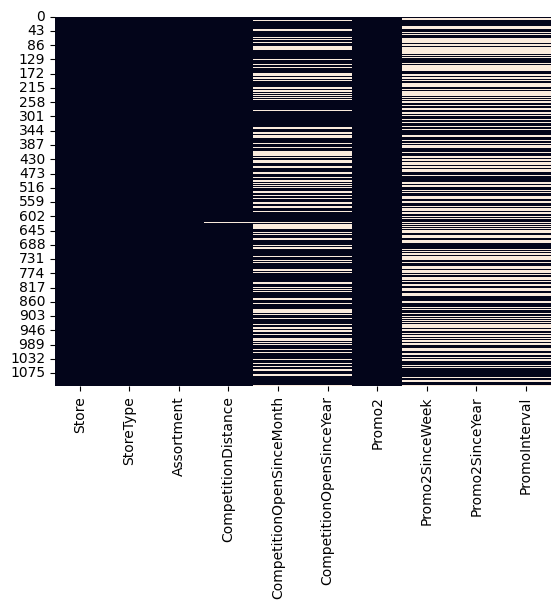

In [ ]:
sns.heatmap(store_info_df.isnull(), cbar=False);

In [ ]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [ ]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


##**Pré-processamento** (Loja)

In [ ]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']

for col in str_cols:
    store_info_df[col].fillna(0, inplace=True)

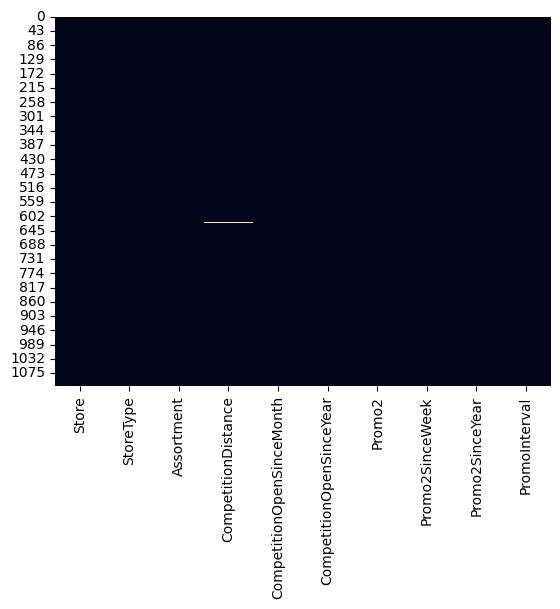

In [ ]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [ ]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

<ipython-input-40-71778c4c22e2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)


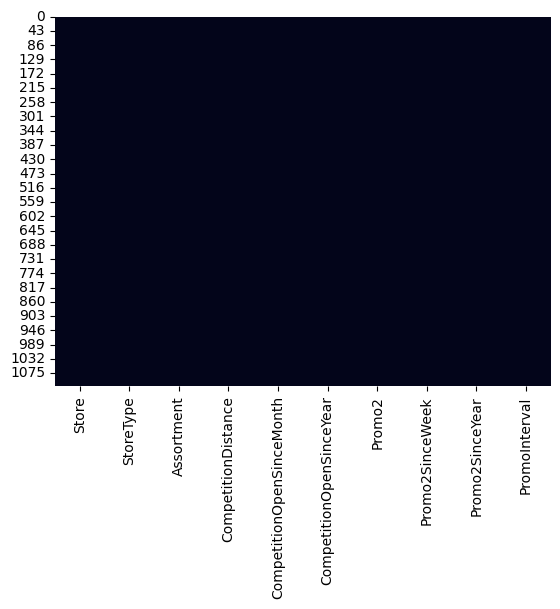

In [ ]:
sns.heatmap(store_info_df.isnull(), cbar = False);

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionDistance'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>,
        <Axes: title={'center': 'Promo2SinceWeek'}>],
       [<Axes: title={'center': 'Promo2SinceYear'}>, <Axes: >, <Axes: >]],
      dtype=object)

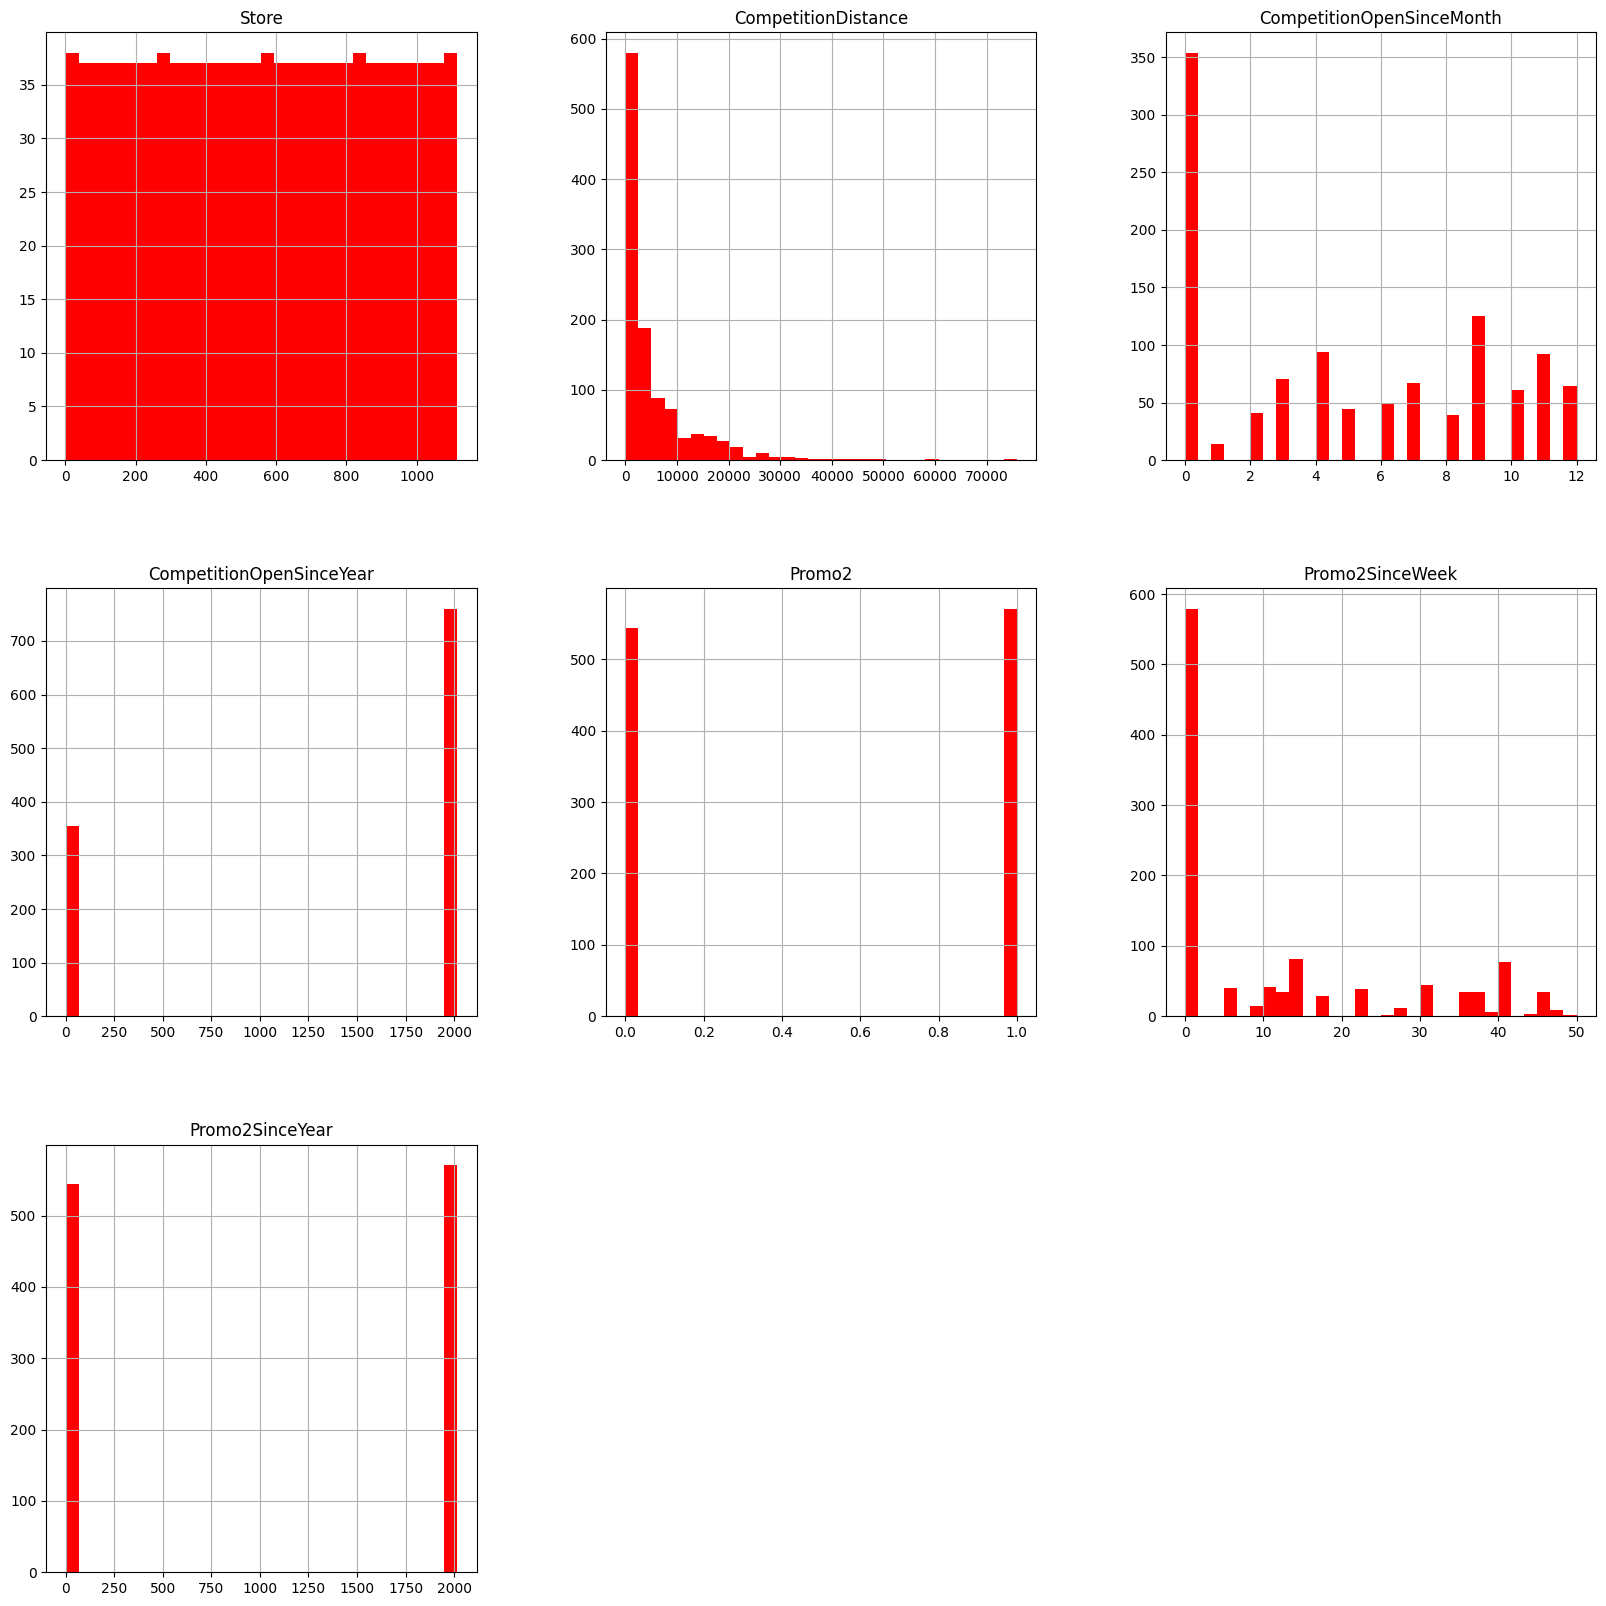

In [ ]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

##**Pré-processamento**: Junção dos DataFrames (Integração de Dados)


In [ ]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [ ]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [ ]:
sales_train_all_df.shape

(844392, 17)

In [ ]:
sales_train_all_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
844387,682,2,2013-01-01,3375,566,0,a,1,b,a,150.0,9.0,2006.0,0,0.0,0.0,0
844388,733,2,2013-01-01,10765,2377,0,a,1,b,b,860.0,10.0,1999.0,0,0.0,0.0,0
844389,769,2,2013-01-01,5035,1248,0,a,1,b,b,840.0,0.0,0.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
844390,948,2,2013-01-01,4491,1039,0,a,1,b,b,1430.0,0.0,0.0,0,0.0,0.0,0
844391,1097,2,2013-01-01,5961,1405,0,a,1,b,b,720.0,3.0,2002.0,0,0.0,0.0,0


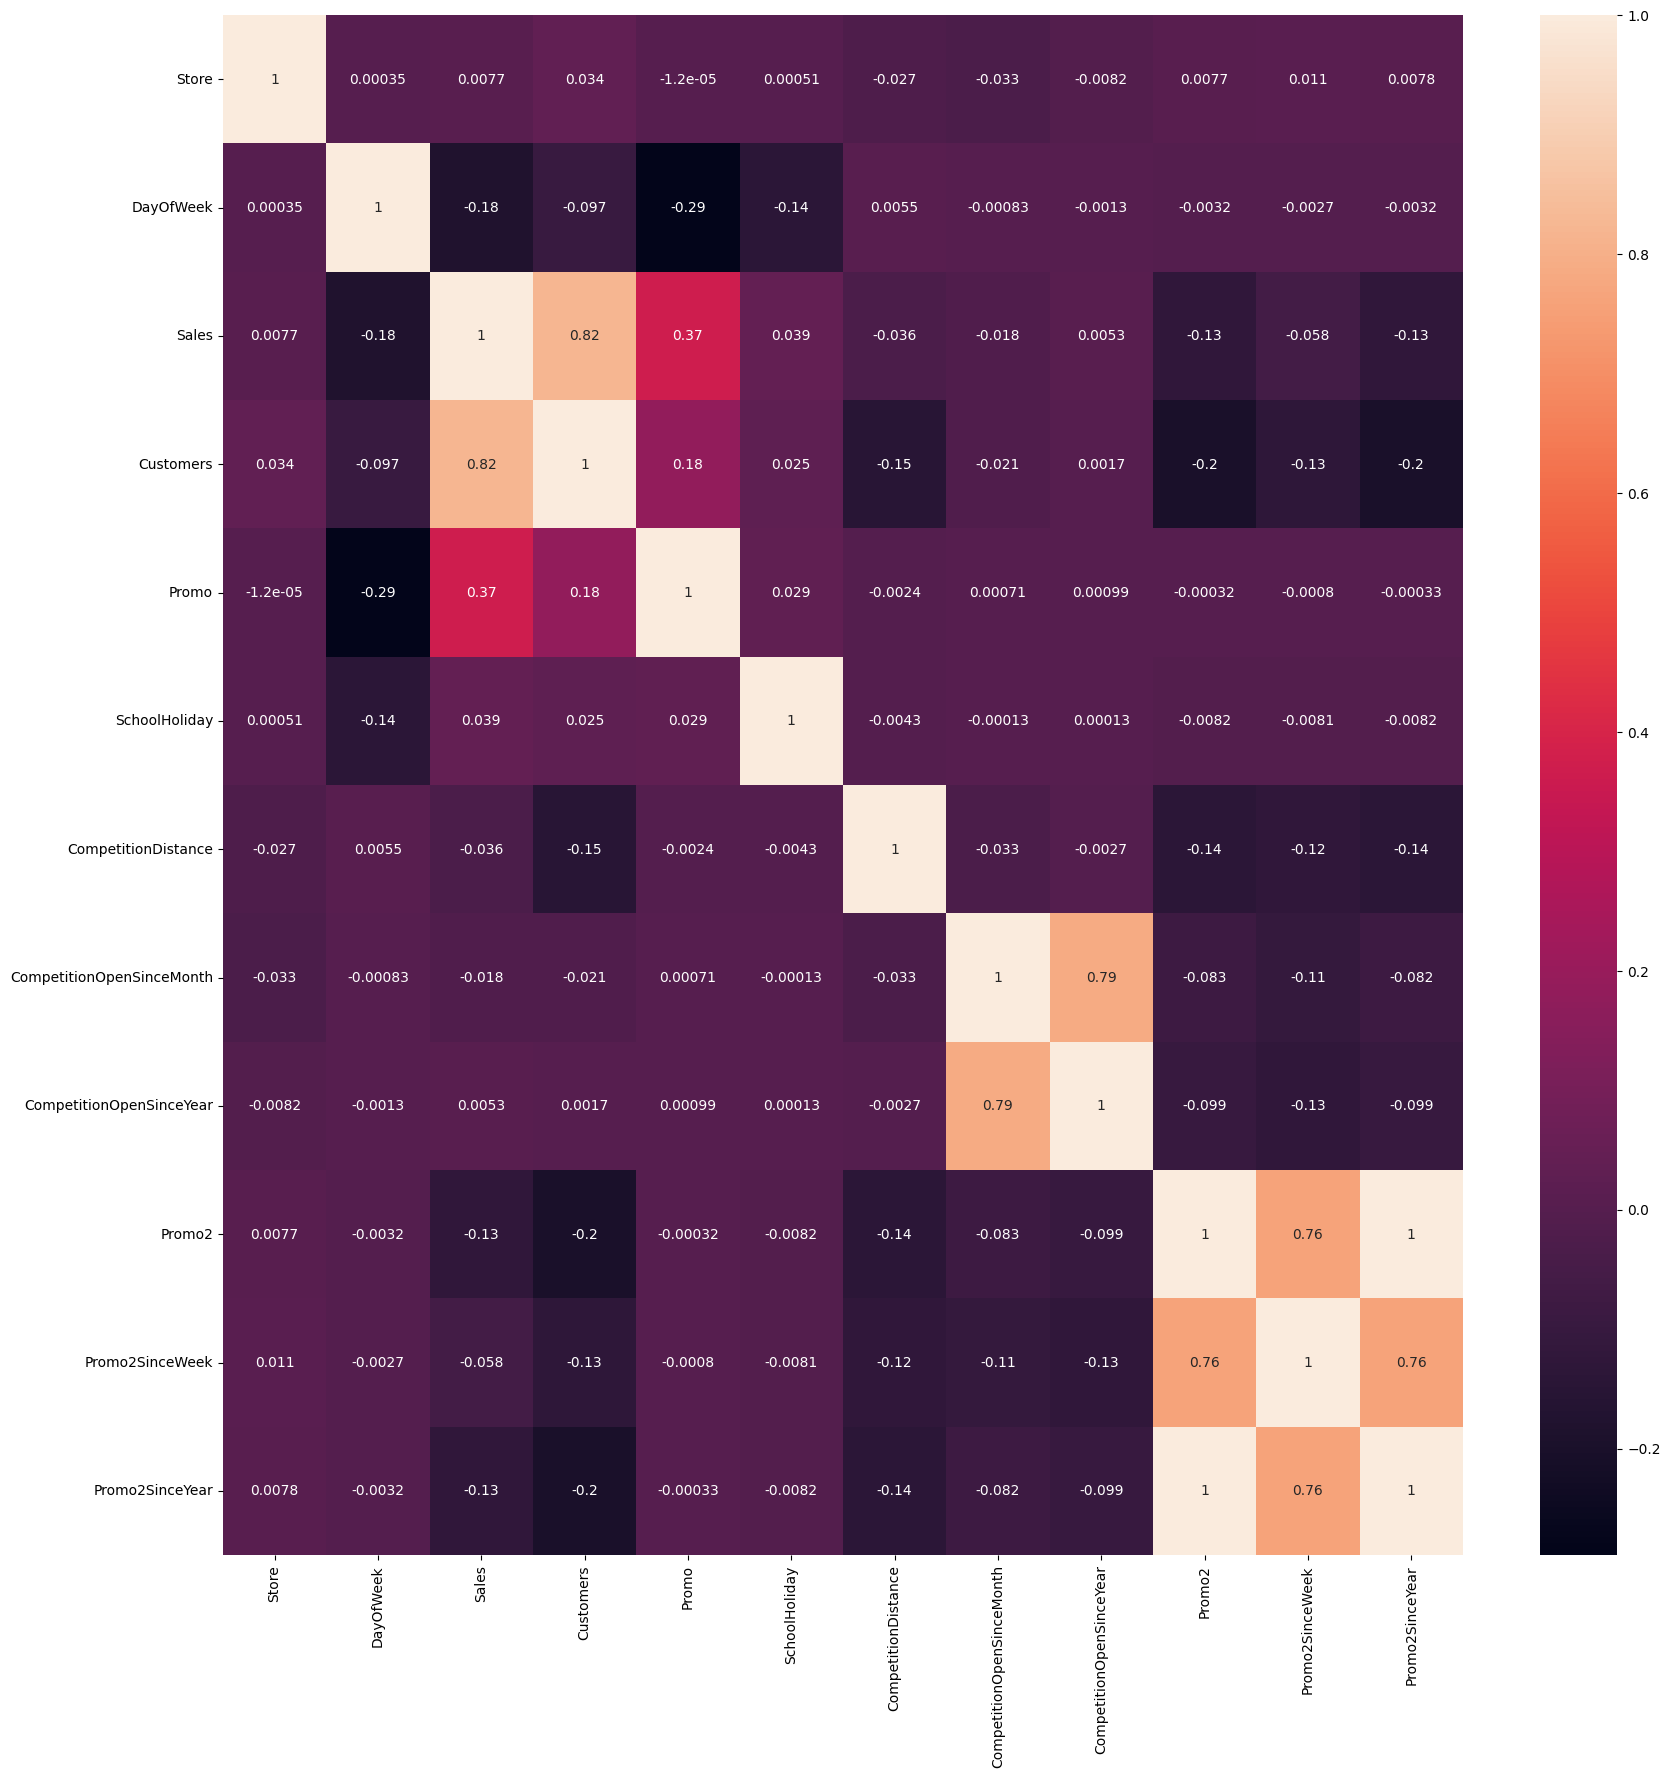

In [ ]:
# correlations = sales_train_all_df.corr()
correlations = sales_train_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

In [ ]:
# correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations = sales_train_all_df.corr(numeric_only=True)['Sales'].sort_values()
correlations

,Sales
DayOfWeek,-0.178736
Promo2SinceYear,-0.127621
Promo2,-0.127596
Promo2SinceWeek,-0.058476
CompetitionDistance,-0.036343
CompetitionOpenSinceMonth,-0.018370
CompetitionOpenSinceYear,0.005266
Store,0.007710
SchoolHoliday,0.038617
Promo,0.368145


##**Engenharia de Atributos**: Extração de Variáveis Temporais
Nesta etapa, extraímos informações de tempo (ano, mês, dia, semana, etc.) a partir da coluna de datas para enriquecer nosso conjunto de dados e ajudar o modelo a capturar padrões sazonais.


In [ ]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015


In [ ]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


Text(0.5, 1.0, 'Média de vendas por mês')

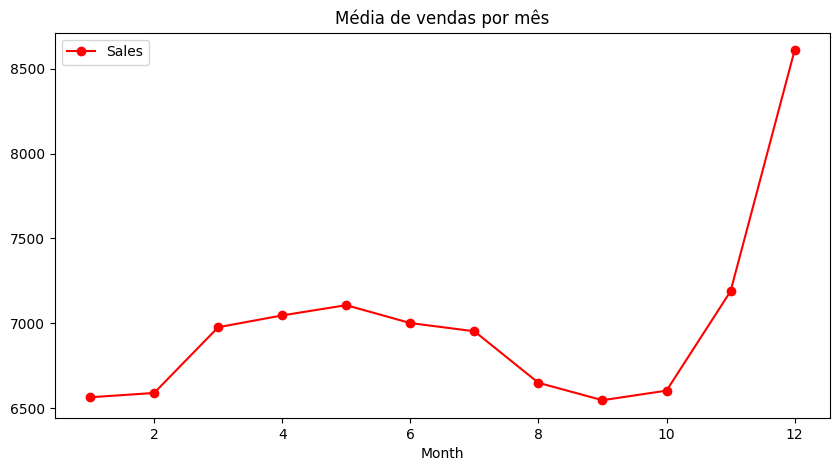

In [ ]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de clientes por mês')

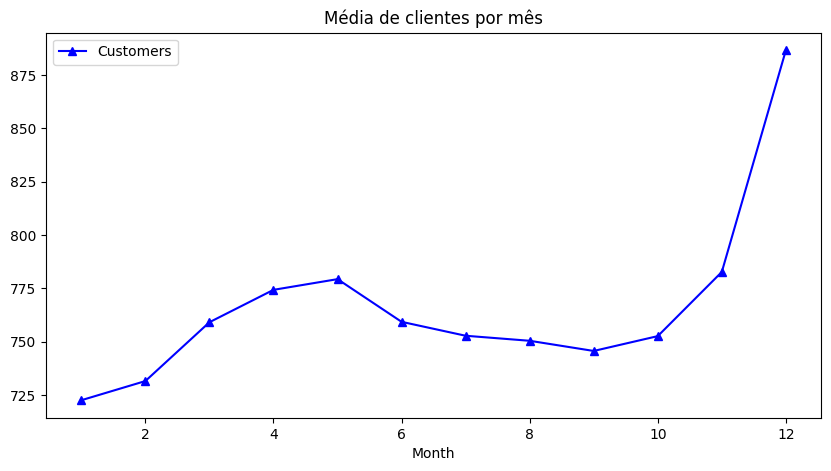

In [ ]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

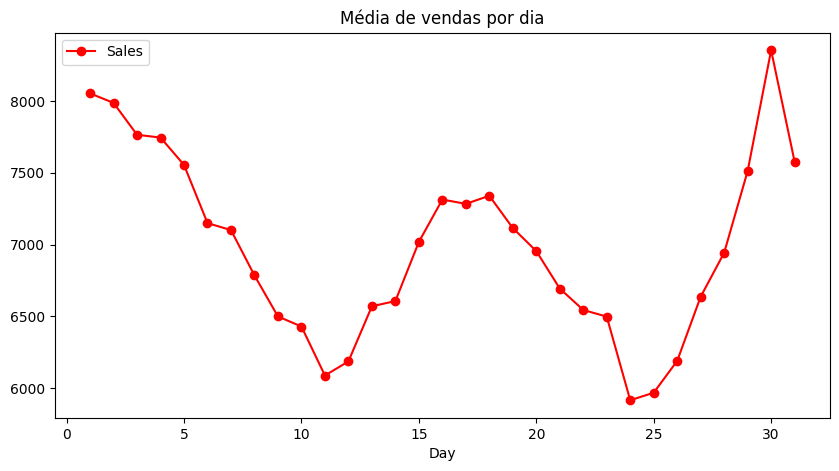

In [ ]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

Text(0.5, 1.0, 'Média de clientes por dia')

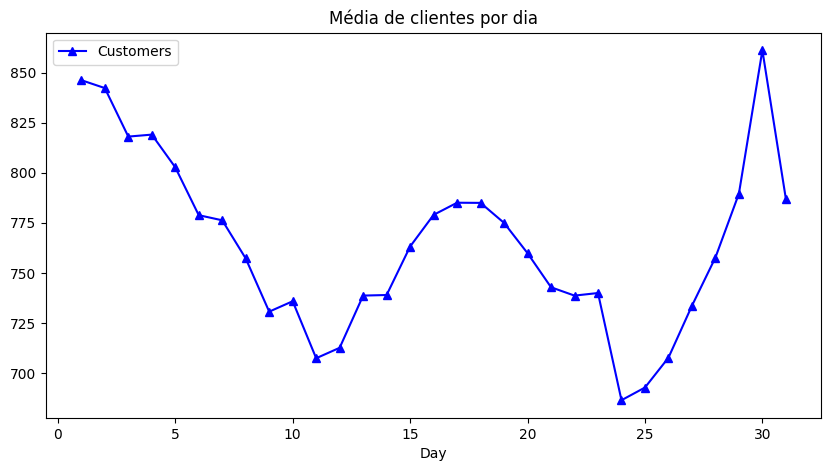

In [ ]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

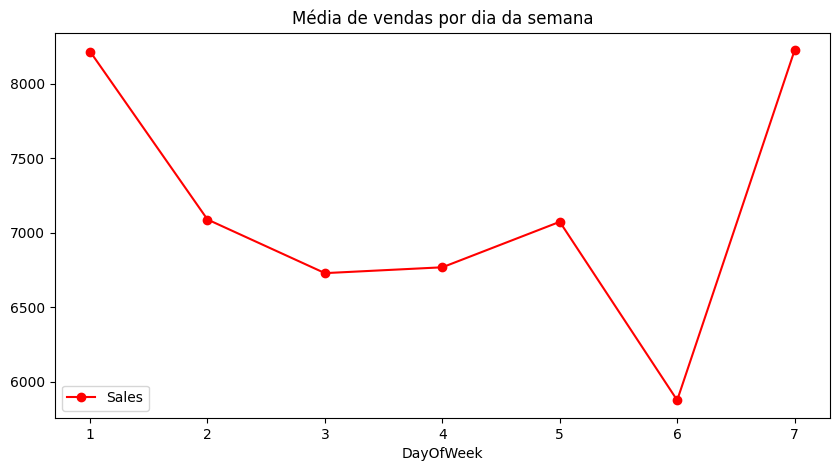

In [ ]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

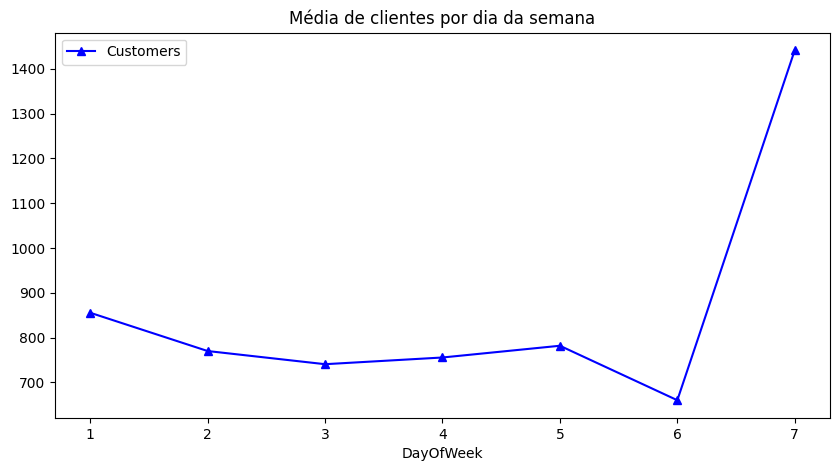

In [ ]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

<Axes: xlabel='Date'>

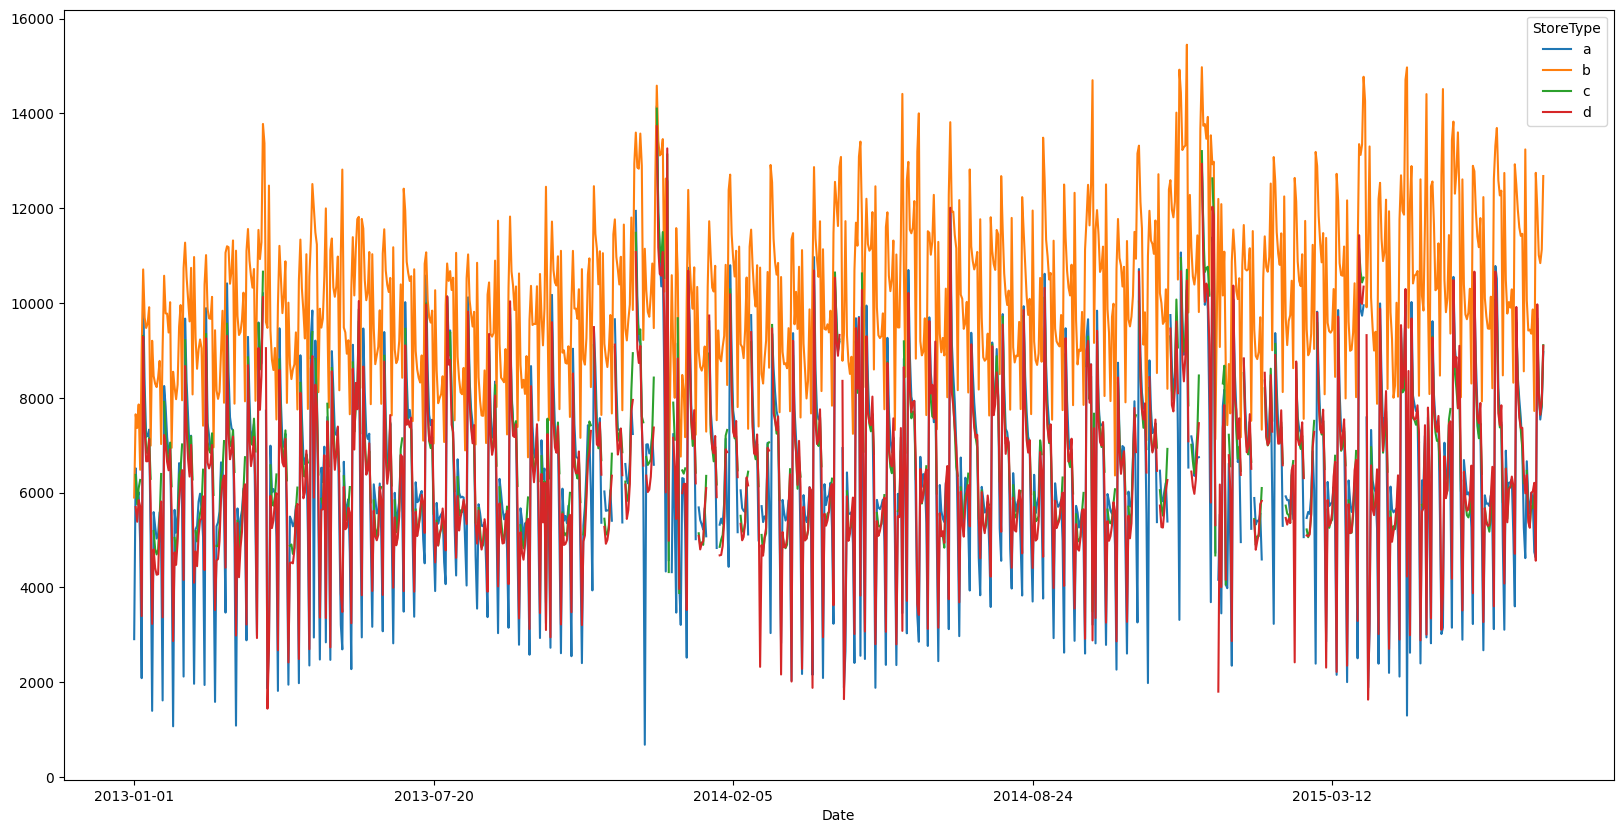

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
# sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)
sales_train_all_df.groupby(['Date', 'StoreType']).mean(numeric_only=True)['Sales'].unstack().plot(ax = ax)

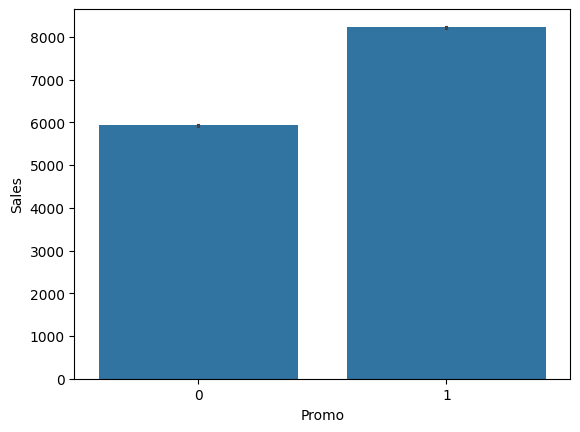

In [ ]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

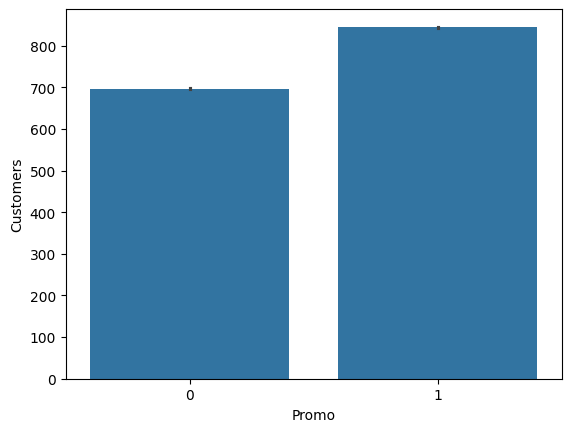

In [ ]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

**Resumo**

Após o pré-processamento inicial, seguimos para um aprofundamento na análise dos dados, buscando compreender melhor os fatores que influenciam as vendas das lojas.

Primeiramente, trabalhamos no tratamento dos dados das lojas. Notamos que algumas colunas relacionadas à presença de promoções e informações sobre concorrentes continham valores faltantes. Para facilitar a análise, substituímos esses valores ausentes por zeros, indicando a ausência dessas características, e utilizamos a média para preencher as distâncias dos concorrentes, já que essa coluna tinha poucos dados faltantes. Essa etapa foi essencial para garantir a qualidade e integridade do conjunto de dados final.

Em seguida, unimos as informações de vendas diárias com os dados da loja, criando um único conjunto completo que relaciona desempenho, características da loja e variáveis externas.

Com o conjunto unificado, realizamos uma análise de correlação para entender quais fatores estavam mais relacionados às vendas. Observamos que o número de clientes foi o maior indicador do volume de vendas, mostrando uma correlação muito forte. Além disso, a presença de promoções no dia também teve um impacto positivo, embora menos intenso. Outros fatores, como a proximidade da concorrência, apresentaram pouca ou nenhuma relação direta com as vendas.

Para explorar os dados ao longo do tempo, extraímos informações importantes da coluna de datas, criando variáveis separadas para o ano, mês e dia. Isso nos permitiu visualizar melhor as tendências e sazonalidades.

Ao analisar as médias de vendas e clientes por mês, identificamos variações ao longo do ano que podem estar associadas a fatores sazonais e campanhas específicas. Também avaliamos o desempenho médio das vendas por tipo de loja, ao longo do tempo, destacando diferenças relevantes entre os formatos.

Por fim, investigamos o impacto das promoções, confirmando que os dias em que as lojas realizam promoções têm um aumento significativo nas vendas, passando de uma média de 6.000 para cerca de 8.000. Esse efeito positivo também se reflete no aumento do número de clientes, que sobe de aproximadamente 700 para 800 nos dias promocionais.

Esses insights reforçam a importância das promoções e do fluxo de clientes para o desempenho das lojas, e indicam que o modelo preditivo deverá priorizar essas variáveis para melhor prever as vendas.

##**Modelagem** e Previsão

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/6oirv6hs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/oxe7itb6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3218', 'data', 'file=/tmp/tmp537ia135/6oirv6hs.json', 'init=/tmp/tmp537ia135/oxe7itb6.json', 'output', 'file=/tmp/tmp537ia135/prophet_modelay30okrf/prophet_model-20250527010531.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:05:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:05:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


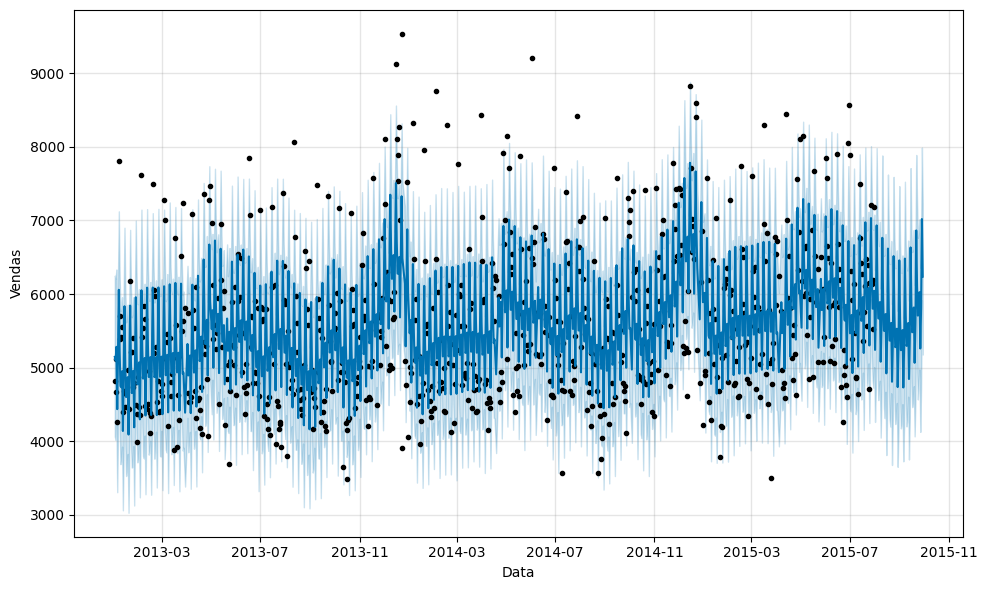

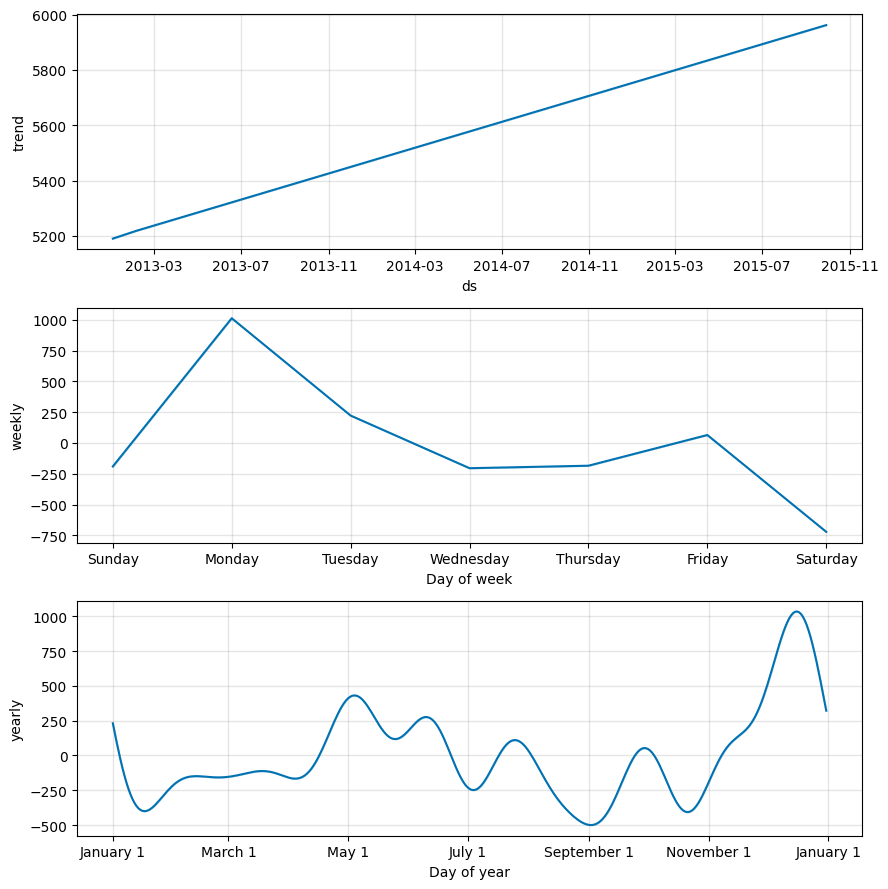

In [ ]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [ ]:
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [ ]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5190.614688,4064.885822,6250.461405,5190.614688,5190.614688,-43.911087,-43.911087,-43.911087,-204.315415,-204.315415,-204.315415,160.404328,160.404328,160.404328,0.0,0.0,0.0,5146.703601
1,2013-01-03,5191.481852,4017.874595,6213.017232,5191.481852,5191.481852,-92.671525,-92.671525,-92.671525,-184.197833,-184.197833,-184.197833,91.526309,91.526309,91.526309,0.0,0.0,0.0,5098.810327
2,2013-01-04,5192.349016,4278.270049,6334.107268,5192.349016,5192.349016,90.439306,90.439306,90.439306,64.871229,64.871229,64.871229,25.568077,25.568077,25.568077,0.0,0.0,0.0,5282.788322
3,2013-01-05,5193.216180,3307.369518,5453.439236,5193.216180,5193.216180,-757.173035,-757.173035,-757.173035,-720.328073,-720.328073,-720.328073,-36.844962,-36.844962,-36.844962,0.0,0.0,0.0,4436.043145
4,2013-01-07,5194.950508,5016.014441,7123.797421,5194.950508,5194.950508,862.910745,862.910745,862.910745,1011.846434,1011.846434,1011.846434,-148.935689,-148.935689,-148.935689,0.0,0.0,0.0,6057.861253


In [ ]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5916.526577,4262.282334,6321.983017,5916.526577,5916.526577,-675.503916,-675.503916,-675.503916,-720.328073,-720.328073,-720.328073,44.824157,44.824157,44.824157,0.0,0.0,0.0,5241.022661
785,2015-08-02,5917.294958,4708.152136,6822.117555,5917.294958,5917.294958,-165.648395,-165.648395,-165.648395,-190.330875,-190.330875,-190.330875,24.682481,24.682481,24.682481,0.0,0.0,0.0,5751.646564
786,2015-08-03,5918.063340,5888.915836,7982.215948,5918.063340,5918.063340,1014.627620,1014.627620,1014.627620,1011.846434,1011.846434,1011.846434,2.781186,2.781186,2.781186,0.0,0.0,0.0,6932.690960
787,2015-08-04,5918.831722,5106.491193,7097.723251,5918.831722,5918.831722,201.932232,201.932232,201.932232,222.454534,222.454534,222.454534,-20.522302,-20.522302,-20.522302,0.0,0.0,0.0,6120.763954
788,2015-08-05,5919.600104,4559.595245,6775.312354,5919.600104,5919.600104,-249.189126,-249.189126,-249.189126,-204.315415,-204.315415,-204.315415,-44.873711,-44.873711,-44.873711,0.0,0.0,0.0,5670.410978
789,2015-08-06,5920.368486,4678.206370,6652.687318,5920.368486,5920.368486,-254.128476,-254.128476,-254.128476,-184.197833,-184.197833,-184.197833,-69.930643,-69.930643,-69.930643,0.0,0.0,0.0,5666.240009
790,2015-08-07,5921.136867,4821.905098,6980.083100,5921.136867,5921.136867,-30.499153,-30.499153,-30.499153,64.871229,64.871229,64.871229,-95.370383,-95.370383,-95.370383,0.0,0.0,0.0,5890.637714
791,2015-08-08,5921.905249,4049.600634,6072.552651,5921.905249,5921.906377,-841.224648,-841.224648,-841.224648,-720.328073,-720.328073,-720.328073,-120.896575,-120.896575,-120.896575,0.0,0.0,0.0,5080.680601
792,2015-08-09,5922.673631,4620.906859,6624.213984,5922.673203,5922.676849,-336.575486,-336.575486,-336.575486,-190.330875,-190.330875,-190.330875,-146.244610,-146.244610,-146.244610,0.0,0.0,0.0,5586.098145
793,2015-08-10,5923.442013,5673.896085,7883.178650,5923.440228,5923.447094,840.660832,840.660832,840.660832,1011.846434,1011.846434,1011.846434,-171.185602,-171.185602,-171.185602,0.0,0.0,0.0,6764.102845


In [ ]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [ ]:
df_origin.tail()

,ds,y
4461,2015-07-27,7212
3348,2015-07-28,6140
2235,2015-07-29,5524
1122,2015-07-30,6186
9,2015-07-31,7185


##Treinamento do modelo 2

In [ ]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [ ]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [ ]:
school_holidays

array(['2015-07-31', '2015-07-31', '2015-07-31', ..., '2013-01-01',
       '2013-01-01', '2013-01-01'], dtype=object)

In [ ]:
len(np.unique(school_holidays))

477

In [ ]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [ ]:
state_holidays.shape

(910,)

In [ ]:
len(np.unique(state_holidays))

35

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
905,2013-01-01,state_holiday
906,2013-01-01,state_holiday
907,2013-01-01,state_holiday
908,2013-01-01,state_holiday


In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-31,school_holiday
2,2015-07-31,school_holiday
3,2015-07-31,school_holiday
4,2015-07-31,school_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


In [ ]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2015-06-04,state_holiday
1,2015-06-04,state_holiday
2,2015-06-04,state_holiday
3,2015-06-04,state_holiday
4,2015-06-04,state_holiday
...,...,...
163452,2013-01-01,school_holiday
163453,2013-01-01,school_holiday
163454,2013-01-01,school_holiday
163455,2013-01-01,school_holiday


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/e76wqmge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/fkuu_ghm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19977', 'data', 'file=/tmp/tmp537ia135/e76wqmge.json', 'init=/tmp/tmp537ia135/fkuu_ghm.json', 'output', 'file=/tmp/tmp537ia135/prophet_modeld1t3ievz/prophet_model-20250527013129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:31:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:31:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


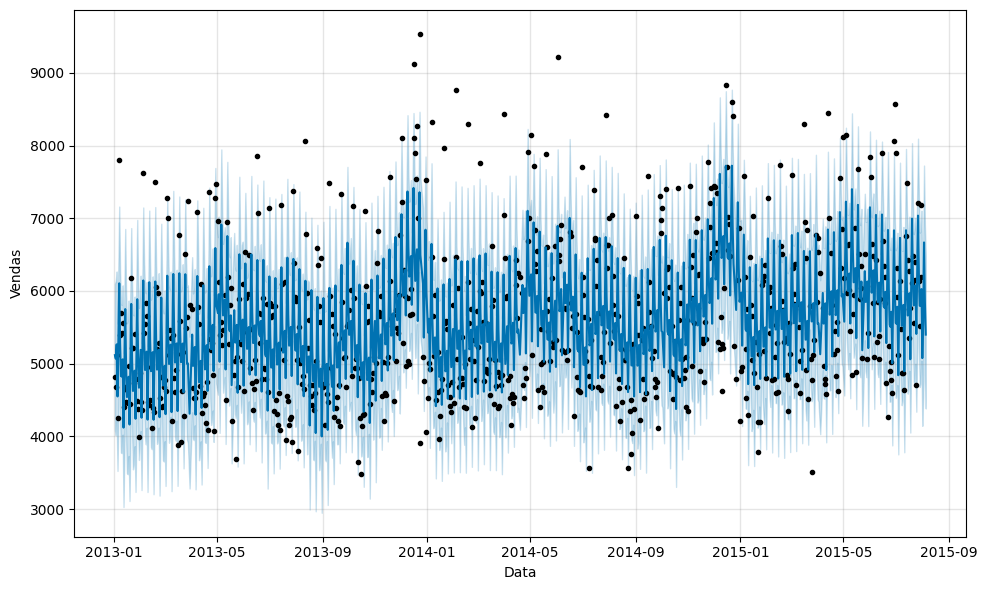

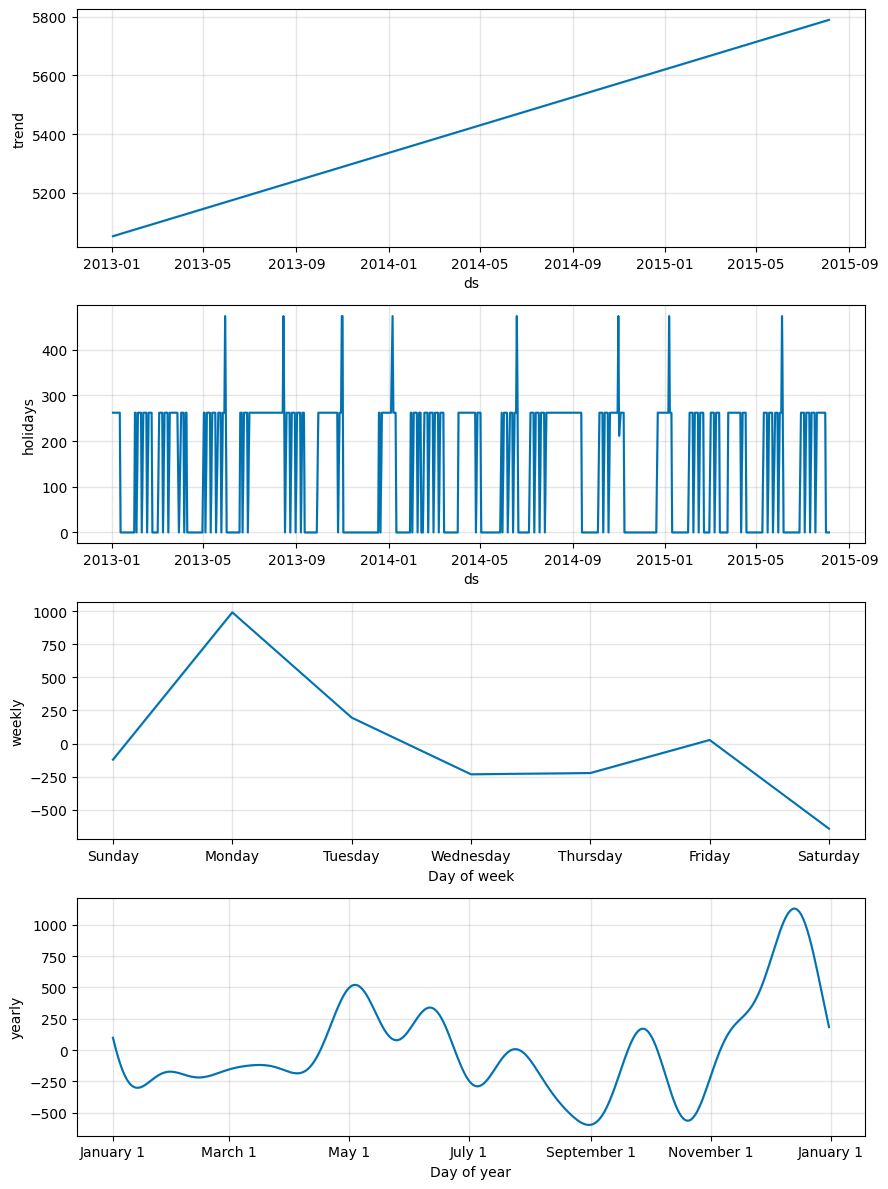

In [ ]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [ ]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5051.418288,4082.041001,6099.443782,5051.418288,5051.418288,65.519185,65.519185,65.519185,262.246018,...,-231.166651,-231.166651,-231.166651,34.439818,34.439818,34.439818,0.0,0.0,0.0,5116.937473
1,2013-01-03,5052.199508,4014.465657,6138.419641,5052.199508,5052.199508,16.433113,16.433113,16.433113,262.246018,...,-221.627364,-221.627364,-221.627364,-24.185540,-24.185540,-24.185540,0.0,0.0,0.0,5068.632621
2,2013-01-04,5052.980728,4235.935691,6267.810970,5052.980728,5052.980728,212.514539,212.514539,212.514539,262.246018,...,27.837268,27.837268,27.837268,-77.568747,-77.568747,-77.568747,0.0,0.0,0.0,5265.495267
3,2013-01-05,5053.761948,3525.181582,5552.059131,5053.761948,5053.761948,-504.488386,-504.488386,-504.488386,262.246018,...,-641.383965,-641.383965,-641.383965,-125.350439,-125.350439,-125.350439,0.0,0.0,0.0,4549.273562
4,2013-01-07,5055.324388,5076.608631,7160.192045,5055.324388,5055.324388,1049.599063,1049.599063,1049.599063,262.246018,...,990.623490,990.623490,990.623490,-203.270445,-203.270445,-203.270445,0.0,0.0,0.0,6104.923451


In [ ]:
pip install joblib


In [ ]:
# Suponha que sales_train_all_df é o seu dataframe completo, já carregado
sales_df = sales_train_all_df[sales_train_all_df['Store'] == 10][['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(sales_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/7bxi3vzf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp537ia135/vviu8_ar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1921', 'data', 'file=/tmp/tmp537ia135/7bxi3vzf.json', 'init=/tmp/tmp537ia135/vviu8_ar.json', 'output', 'file=/tmp/tmp537ia135/prophet_modell5y9cinq/prophet_model-20250527015149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:51:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:51:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
import joblib
joblib.dump(model, 'prophet_model.pkl')

['prophet_model.pkl']

In [ ]:
#teste
model_loaded = joblib.load('prophet_model.pkl')

In [ ]:
future = model_loaded.make_future_dataframe(periods=90)

In [ ]:
forecast = model_loaded.predict(future)

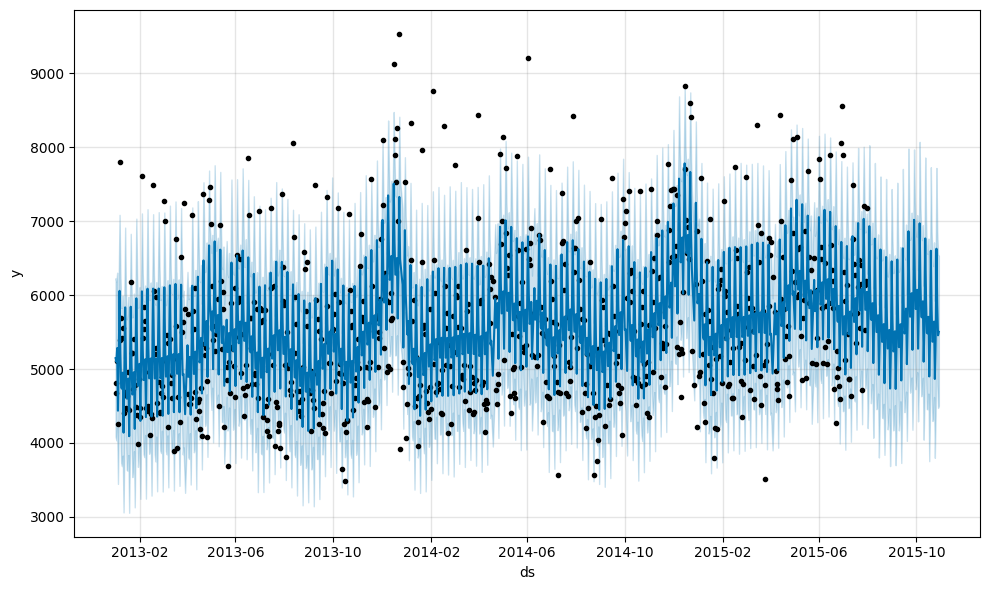

In [ ]:
model_loaded.plot(forecast);

In [ ]:
from datetime import datetime

# Converte a última data para datetime
ultima_data = pd.to_datetime(sales_df['ds'].max())

fim_2025 = datetime(2025, 12, 31)

# Agora sim calcula os dias
periodos_para_2025 = (fim_2025 - ultima_data).days

# Gera o futuro dataframe e faz a previsão
future = model.make_future_dataframe(periods=periodos_para_2025)
forecast = model.predict(future)

# Filtra só para 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
print(forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


             ds          yhat   yhat_lower    yhat_upper
4225 2025-01-01   8587.719300  7447.508628   9691.471889
4226 2025-01-02   8537.503112  7493.024001   9645.203382
4227 2025-01-03   8718.462537  7575.656455   9718.486106
4228 2025-01-04   7868.073384  6751.132764   8962.700598
4229 2025-01-05   8336.425925  7269.533711   9333.637453
...         ...           ...          ...           ...
4585 2025-12-27   8726.525633  7687.755297   9806.487191
4586 2025-12-28   9187.748032  8201.087495  10272.964458
4587 2025-12-29  10319.047837  9323.624154  11396.802941
4588 2025-12-30   9457.535118  8406.980608  10580.665220
4589 2025-12-31   8958.260161  7967.116890  10028.020218

[365 rows x 4 columns]
